# 活性化関数

### 発火するか、しないか or 発火するならどのくらいの発火なのかを定める

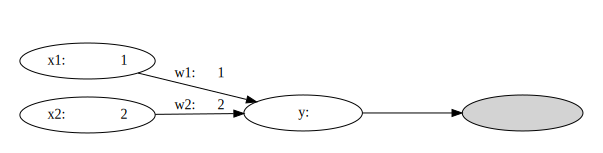

In [1]:
from graphviz import Digraph
dot = Digraph(comment="単純パーセプトロン")
dot.attr(rankdir="LR")
dot.attr(splines="line")
dot.attr(fixedsize="true")
with dot.subgraph(name="cluster_x") as x:
    x.attr(label="入力層")
    x.attr(color="white")
    x.node("x1","x1:入力ノード1")
    x.node("x2","x2:入力ノード2")
with dot.subgraph(name="cluster_y") as y:
    y.attr(label="出力層")
    y.attr(color="white")
    y.node("y","y:出力ノード")
with dot.subgraph(name="cluster_a") as a:
    a.attr(color="white")
    a.node("a","伝播先ノード",style="filled")

dot.edge("x1", "y", label="w1:重み1")
dot.edge("x2",  "y", label="w2:重み2")
dot.edge("y",  "a", label="活性化関数",fontcolor="red")
#print(dot)
dot

## Sigmoid関数 (シグモイド関数）

便利な非線形関数

$ h_ \theta (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{- \theta x} }  $

これは$ \theta = 1 $の時、標準シグモイド関数となる。

$ h_ 1 (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-x} } $ 

標準シグモイド関数は$ x $の値がいかなる数値であっても結果は$ 0 < h_1(x) < 1 $となる

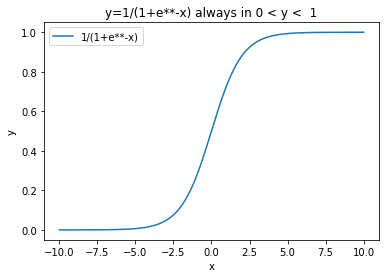

In [2]:
%matplotlib inline
#plt.show()をinlineにて表示する
#Esc+Lで行番号を表示する1
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10,10,0.001) #-0 to 10 by 0.001
y = 1.0/(1.0 + np.e ** (-1.0*x))

plt.plot(x,y,label="1/(1+e**-x)", linestyle="-")

plt.xlabel("x")
plt.ylabel("y")

plt.title("y=1/(1+e**-x) always in 0 < y <  1")

plt.legend()#show label box

plt.show()
plt.close()

## ステップ関数

### xがどの値であっても0か1を指す非線形関数

In [3]:
import numpy as np
def step_function(x):
    """x: numpy.Array"""
    y = x > 0
    #x(int)がboolに変換されるので、またintに直す
    return y.astype(np.int)

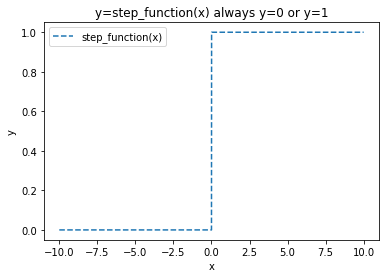

In [4]:
%matplotlib inline
#plt.show()をinlineにて表示する
#Esc+Lで行番号を表示する1
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
def step_function(x):
    y = x > 0
    return y.astype(np.int)

x = np.arange(-10,10,0.001) #-10 to 10 by 0.001
y = step_function(x)

plt.plot(x,y,label="step_function(x)", linestyle="--")

plt.xlabel("x")
plt.ylabel("y")

plt.title("y=step_function(x) always y=0 or y=1")

plt.legend()#show label box

plt.show()
plt.close()

## シグモイド関数とステップ関数の関係

### ステップ関数では情報量が欠ける

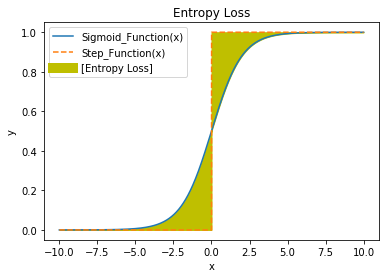

In [5]:
%matplotlib inline
#plt.show()をinlineにて表示する
#Esc+Lで行番号を表示する1
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10,10,0.001) #-0 to 10 by 0.001
y1 = 1.0/(1.0 + np.e ** (-1.0*x))

def step_function(x):
    y = x > 0
    return y.astype(np.int)

y2 = step_function(x)

plt.plot(x,y1,label="Sigmoid_Function(x)", linestyle="-")
plt.plot(x,y2,label="Step_Function(x)", linestyle="--")
plt.fill_between(x,y1,y2,color="y")
plt.plot([], [], color="y", linewidth=10, label="[Entropy Loss]")
plt.title("""Entropy Loss""")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()#show label box
plt.show()
plt.close()

### 活性関数は非線形関数でなければならない

活性関数が線形関数の場合は計算結果が予測可能となり計算式も因数分解が可能となる(＝一瞬で演算が収束する)。そうなった場合多層パーセプトロンは組む意味がない。今後は非線形(パーセプトロンやシグモイドのような)になることを意識しなければならない。活性化関数に線形関数を使っても得られる情報は価値（情報量、エントロピー）が少ない。

### 活性関数の特徴

- ステップ関数：劇的な信号の変化を発生させる  
- シグモイド関数：緩やかな信号の変化を発生させる
- RELU：？

## RELU関数（Rectified Liner Unit）

$ \begin{eqnarray}
出力\ \ \ \ h(x) = \left\{
\begin{array}{ll}
x\ \ \ \ (x \gt 0)\\
0\ \ \ \ (x \leq 0)\\
\end{array}
\right\}
\end{eqnarray} $

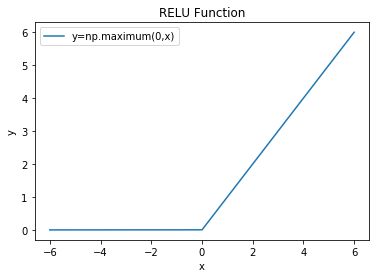

In [6]:
%matplotlib inline
#plt.show()をinlineにて表示する
#Esc+Lで行番号を表示する1
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-6,6,0.001) #-6 to 6 by 0.001

def relu(x):
    return np.maximum(0,x)

plt.plot(x,relu(x),label="y=np.maximum(0,x)", linestyle="-")
plt.xlabel("x")
plt.ylabel("y")
plt.title("RELU Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()#show label box
plt.show()
plt.close()

# 多次元配列に慣れる

In [7]:
import numpy as np
A = np.array([1,2,3,4])
print(A)
print("何次元配列➡︎",A.ndim)
print("何行、何列➡︎",A.shape)

[1 2 3 4]
何次元配列➡︎ 1
何行、何列➡︎ (4,)


In [8]:
import numpy as np
A = np.array([[1,2,3,4],[5,6,7,8]])
print(A)
print("何次元配列➡︎",A.ndim)
print("何行、何列➡︎",A.shape)

[[1 2 3 4]
 [5 6 7 8]]
何次元配列➡︎ 2
何行、何列➡︎ (2, 4)


In [9]:
import numpy as np
A = np.array([[1,2,3,4],[5,6,7,8],[0,-1,-2,-3]])
print(A)
print("何次元配列➡︎",A.ndim)
print("何行、何列➡︎",A.shape)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 0 -1 -2 -3]]
何次元配列➡︎ 2
何行、何列➡︎ (3, 4)


## 内積(ドット積)

In [10]:
import numpy as np
A = np.array([[1,2,3,4],[5,6,7,8],[0,-1,-2,-3]])
B = np.array([[1,2,3],[5,6,7],[0,-1,-2],[4,5,6]])
print("何次元配列➡︎",A.ndim)
print("何行、何列➡︎",A.shape)
print(A)
print("x")
print("何次元配列➡︎",B.ndim)
print("何行、何列➡︎",B.shape)
print(B)
print("=")
C=np.dot(A,B)
print(C)
print("何次元配列➡︎",C.ndim)
print("何行、何列➡︎",C.shape)

何次元配列➡︎ 2
何行、何列➡︎ (3, 4)
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 0 -1 -2 -3]]
x
何次元配列➡︎ 2
何行、何列➡︎ (4, 3)
[[ 1  2  3]
 [ 5  6  7]
 [ 0 -1 -2]
 [ 4  5  6]]
=
[[ 27  31  35]
 [ 67  79  91]
 [-17 -19 -21]]
何次元配列➡︎ 2
何行、何列➡︎ (3, 3)


## ニューラルネットワークにおける内積(ドット積)

### 行列に見立てる事により、一度に計算が可能となり、なおかつ行列計算式が使用可能となる

### 一層ニューラルネットワークの場合（バイヤス無し）

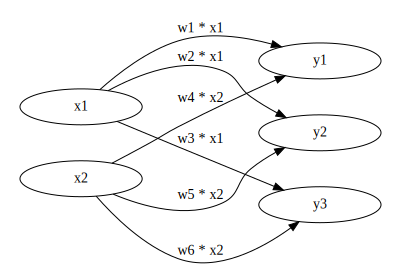

In [11]:
from graphviz import Digraph
dot = Digraph(comment="単純パーセプトロン")
dot.attr(rankdir="LR")
dot.attr(ranksep="1.0")
dot.attr(nodesep="0.5")
with dot.subgraph(name="cluster_x") as x:
    x.attr(label="入力層")
    x.attr(color="white")
    x.node("x1","入力ノードx1")
    x.node("x2","入力ノードx2")
with dot.subgraph(name="cluster_y") as y:
    y.attr(label="出力層")
    y.attr(color="white")
    y.node("y1","出力ノードy1")
    y.node("y2","出力ノードy2")
    y.node("y3","出力ノードy3")
dot.edge("x1", "y1", label="w1 * x1")
dot.edge("x1", "y2", label="w2 * x1")
dot.edge("x1", "y3", label="w3 * x1")
dot.edge("x2", "y1", label="w4 * x2")
dot.edge("x2", "y2", label="w5 * x2")
dot.edge("x2", "y3", label="w6 * x2")
dot

In [12]:
import numpy as np
x1 = 1
x2 = 2
X = np.array([x1,x2])
x1_W = [1,3,5]
x2_W = [2,4,6]
W = np.array([x1_W, x2_W])
Y = np.dot(X,W)
print("入力")
print(X)
print("出力重み")
print(W)
print("出力")
y1,y2,y3 = Y
print("y1=",y1)
print("y2=",y2)
print("y3=",y3)
#np.dotの一行で各行列の計算ができた→ニューラルネットワークの伝搬計算がすぐさま可能に

入力
[1 2]
出力重み
[[1 3 5]
 [2 4 6]]
出力
y1= 5
y2= 11
y3= 17


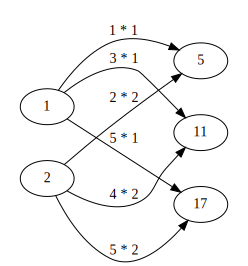

In [13]:
import numpy as np
x1 = 1
x2 = 2
X = np.array([x1,x2])
x1_W = [1,3,5]
x2_W = [2,4,6]
W = np.array([x1_W, x2_W])
Y = np.dot(X,W)
y1,y2,y3 = Y

from graphviz import Digraph
dot = Digraph(comment="単純パーセプトロン")
dot.attr(rankdir="LR")
dot.attr(ranksep="1.0")
dot.attr(nodesep="0.5")
with dot.subgraph(name="cluster_x") as x:
    x.attr(label="入力層")
    x.attr(color="white")
    x.node("x1","1")
    x.node("x2","2")
with dot.subgraph(name="cluster_y") as y:
    y.attr(label="出力層")
    y.attr(color="white")
    y.node("y1","5")
    y.node("y2","11")
    y.node("y3","17")
dot.edge("x1", "y1", label="1 * 1")
dot.edge("x1", "y2", label="3 * 1")
dot.edge("x1", "y3", label="5 * 1")
dot.edge("x2", "y1", label="2 * 2")
dot.edge("x2", "y2", label="4 * 2")
dot.edge("x2", "y3", label="5 * 2")
dot

## 多層ニューラルネットワーク

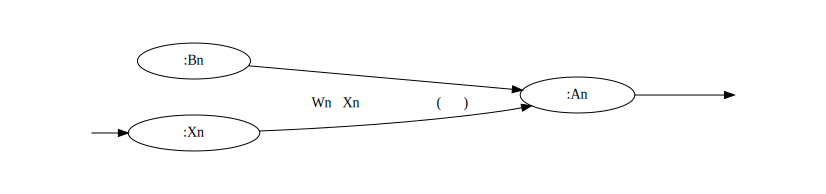

In [14]:
from graphviz import Digraph
dot = Digraph()
dot.attr(label="中間層における行列計算")
dot.attr(rankdir="LR")
dot.attr(ranksep="0.5")
dot.attr(nodesep="0.5")
with dot.subgraph(name="cluster_in") as x:
    x.attr(label="")
    x.attr(color="white")
    x.node("in1","前の層",color="white")
with dot.subgraph(name="cluster_x") as x:
    x.attr(label="計算元")
    x.attr(color="white")
    x.node("b1","バイアス:Bn")
    x.node("x1","入力データ:Xn")
with dot.subgraph(name="cluster_y") as y:
    y.attr(label="計算先")
    y.attr(color="white")
    y.node("y1","計算結果:An")
with dot.subgraph(name="cluster_out") as y:
    y.attr(label="")
    y.attr(color="white")
    y.node("out1","後の層",color="white")

dot.edge("in1","x1", label="")
dot.edge("b1","y1", label="単純加算（行列へのスカラ加算）")
dot.edge("x1", "y1", label="重みWnとXnの行列ドット積(内積)計算")
dot.edge("y1", "out1", label="活性化関数")
dot

$中間層(n)における計算式 {A}^{(n)}=X{W}^{(n)}+B^{(n)}$
$中間層(n)における計算結果 A^{(n)} = (a^{(1)},a^{(2)},a^{(3)},...,a^{(n)})$
$中間層(n)における入力 X^{(n)} = (x^{(1)},x^{(2)},...,x^{(n)})$
$中間層(n)におけるバイアス B^{(n)} = (b^{(1)},b^{(2)},b^{(3)},...,b^{(n)})$
$\begin{eqnarray}
中間層(n)における重みW^{(n)} = \left\{
\begin{array}{ll}
出力行1重み\ W_{(11)},W_{(21)},W_{(31)},... \\
出力行2重み\ W_{(12)},W_{(32)},W_{(32)},... \\
出力行3重み\ W_{(13)},W_{(33)},W_{(33)},... \\
\ \ \ \ \ \ \ \ \ ... \\
出力行N重み\ W_{(1N)},W_{(3N)},W_{(3N)},... \\
\end{array}
\right\}
\end{eqnarray}$

In [15]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
A1 = np.dot(X, W1) + B1
print("入力層の列数",X.shape)
print("中間層の入力層側行数、中間層の出力層側の列数",W1.shape)
print("出力層の行数",B1.shape)
print(A1)

入力層の列数 (2,)
中間層の入力層側行数、中間層の出力層側の列数 (2, 3)
出力層の行数 (3,)
[ 0.3  0.7  1.1]


層と層の間で要素数が異ならなければ、Xの要素数とW1の行数は合致することになるので行列の計算が可能。
つまり、ただ一度も途中でニューロンの数が変わらない前提となるので入力層の数＝計算結果の数となる。
この場合、入力層を増やさなければ、計算結果も増えないため、入力層の数だけの特徴量しか持つことができない。

## 出力層の設計

### ソフトマックス関数

In [16]:
import numpy as np
def softmax(array):
    """一つの行列を0〜1に直します。"""
    return np.exp(array) / np.sum(np.exp(array))

In [17]:
a1,a2,a3 = softmax([1,2,3])
print("a1,a2,a3=",a1,a2,a3)
print("SUM=",a1+a2+a3)

a1,a2,a3= 0.0900305731704 0.244728471055 0.665240955775
SUM= 1.0


### 注意点

In [18]:
print(np.exp([1,2,100000])) #eの100000乗は64bit以上になるので、無限大と扱われてしまう。

[ 2.71828183  7.3890561          inf]


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


In [19]:
import numpy as np
def softmax(array):
    """一つの行列を0〜1に直します。inf簡易対策バージョン。"""
    array = array - np.max(array)
    return np.exp(array) / np.sum(np.exp(array))

In [20]:
a1,a2,a3 = softmax([1,2,3])
print("a1,a2,a3=",a1,a2,a3)
print("SUM=",a1+a2+a3)

a1,a2,a3= 0.0900305731704 0.244728471055 0.665240955775
SUM= 1.0


In [ ]:
a1,a2,a3 = softmax([1,2,1000000])
print("a1,a2,a3=",a1,a2,a3)
print("SUM=",a1+a2+a3)

a1,a2,a3= 0.0 0.0 1.0
SUM= 1.0


#### ニューラルネットワークでは定数の大きさではなく影響力の大きさで計算するので、このオーバーフロー対策は不要

### ニューラルネットワーク層に関する注意点
- 入力層のニューロン数＝テストケースをベクトル化した際の種類の数、ただし異常値やNullを除去したもの
- 中間層のニューロン数＝ハイパーパラメータ
- 出力層のニューロン数＝分類問題であるなら、分類されるべき種類の数、ただし確実にそれ以外の種類が出ないという保証があるもの

## MNIST 0-9画像データセット

利用の前にmnist.pyの中身を参照して元々の画像データがどういう形式で、どういう形に変換されたかを確認すること。
例えば、訓練画像と全く同じデータがテスト画像の中に含まれていないかどうか、外れ値が無いかどうか、Nullが無いかどうか、など。（今回は入っていない）
データのチェック及び加工処理がほとんどの工数を占める

In [ ]:
import sys,os
sys.path.append(os.pardir) #mnist.pyを呼び出すための設定
from dataset.mnist import load_mnist

#flattenで行列ではなく配列にする
#normalizeで0〜1に正規化する
(x_train, t_train),  (x_test, t_test) = load_mnist(flatten=True,normalize=False)
#1画素 = 0〜256
%
print(x_train.shape) # 784画素 x 6万件の学習データ
print(t_train.shape) # 6万件の学習ラベルデータ
print(x_test.shape) # 784画素 x 1万件のテストデータ
print(t_test.shape) # 1万件のテストラベルデータ

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...


- 今回は0〜9の分類になるため、10個の出力層が必要となる
- 入力層は画素数になるので、784個
- 中間層は不明だが、10個以上でなければならない。

In [ ]:
%matplotlib inline
#plt.show()をinlineにて表示する
#Esc+Lで行番号を表示する1
import matplotlib.pyplot as plt
import numpy as np

import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    plt.imshow(pil_img)
    #pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]
img = img.reshape(28, 28)
print("行、列",img.shape)
print("とりあえず画像の表示＝＞",label)
img_show(img)

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

def init_network():
    """学習済の推論モデル(ただの重みとゲタの行列)を読み込む。"""
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

network = init_network()

W1, W2, W3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']
network = init_network()

def predict(network, x):
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

def get_data():
    """正規化済、配列化済のテストデータを読み込む"""
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

x, t = get_data()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        accuracy_cnt += 1
print("正解率:" + str(float(accuracy_cnt) / len(x)) + "% (" + str(int(accuracy_cnt))+" /"+str(len(x)) + ")")

In [ ]:
W1.shape

In [ ]:
W2.shape

In [ ]:
W3.shape

入力層：入力の数と一致している。行数は固定。
中間層：前の行列の列数と後の行列の行数が一致している。行数・列数は固定ではない。50と100の数字は適当に決めることもできるが大きいほど計算も増える。
出力層：出力の数と一致している。列数は固定。

### バッチ処理

行列にスカラを掛けても同一の計算式になるため、入力層を100個にして出力層も100個にすることで同時計算することも可能

In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("正確さ：" + str(int(accuracy_cnt) / len(x)))

正確さに変動が無いことを確認すること。